In [1]:
# import dependences
import pandas as pd
import matplotlib.pyplot as plt
import requests
import numpy as np
from pathlib import Path




In [6]:
# read the csv file into a data frame
data_path = Path('hockey_starting_data', 'Scoring.csv')
name_path = Path('hockey_starting_data', 'Master.csv')
name_data = pd.read_csv(name_path)
data = pd.read_csv(data_path)
merged_data = pd.merge(name_data, data, on='playerID')
data = data[data['lgID']=='NHL']
merged_data


,playerID,coachID,hofID,firstName,lastName,nameNote,nameGiven,nameNick,height,weight,...,PostA,PostPts,PostPIM,Post+/-,PostPPG,PostPPA,PostSHG,PostSHA,PostGWG,PostSOG
0,aaltoan01,NaN,NaN,Antti,Aalto,NaN,Antti,NaN,73.0,210.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,aaltoan01,NaN,NaN,Antti,Aalto,NaN,Antti,NaN,73.0,210.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,aaltoan01,NaN,NaN,Antti,Aalto,NaN,Antti,NaN,73.0,210.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,aaltoan01,NaN,NaN,Antti,Aalto,NaN,Antti,NaN,73.0,210.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,abbeybr01,NaN,NaN,Bruce,Abbey,NaN,Bruce,NaN,73.0,185.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45962,zyuzian01,NaN,NaN,Andrei,Zyuzin,NaN,Andrei,NaN,73.0,208.0,...,1.0,1.0,14.0,-3.0,0.0,0.0,0.0,0.0,0.0,30.0
45963,zyuzian01,NaN,NaN,Andrei,Zyuzin,NaN,Andrei,NaN,73.0,208.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
45964,zyuzian01,NaN,NaN,Andrei,Zyuzin,NaN,Andrei,NaN,73.0,208.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
45965,zyuzian01,NaN,NaN,Andrei,Zyuzin,NaN,Andrei,NaN,73.0,208.0,...,0.0,1.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0


In [69]:
#Filter the Data frame to the columns we need
clean_data = merged_data[['firstName','lastName','year', 'tmID', 'GP','G', 'A', 'Pts','SOG']]
clean_data = clean_data.rename(columns={'firstName': 'First Name', 'lastName': 'Last Name', 'tmID': 'Team ID', 'GP':'Games Played', 'G':'Goals', 'A':'Assists','SOG':'Shots on Goal','year':'Year'})

clean_data

,First Name,Last Name,Year,Team ID,Games Played,Goals,Assists,Pts,Shots on Goal
0,Antti,Aalto,1997,ANA,3.0,0.0,0.0,0.0,1.0
1,Antti,Aalto,1998,ANA,73.0,3.0,5.0,8.0,61.0
2,Antti,Aalto,1999,ANA,63.0,7.0,11.0,18.0,102.0
3,Antti,Aalto,2000,ANA,12.0,1.0,1.0,2.0,18.0
4,Bruce,Abbey,1975,CIN,17.0,1.0,0.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...
45962,Andrei,Zyuzin,2002,MIN,66.0,4.0,12.0,16.0,113.0
45963,Andrei,Zyuzin,2003,MIN,65.0,8.0,13.0,21.0,104.0
45964,Andrei,Zyuzin,2005,MIN,57.0,7.0,11.0,18.0,80.0
45965,Andrei,Zyuzin,2006,CAL,49.0,1.0,5.0,6.0,36.0


In [70]:
#Get the number of shots on goal per team
per_team_data = clean_data.groupby('Year')['Shots on Goal'].mean().dropna()
per_team_df = pd.DataFrame(per_team_data)

per_team_df.head()

,Shots on Goal
Year,
1967,79.622419
1968,83.742857
1969,87.099415
1970,81.174825
1971,79.436620


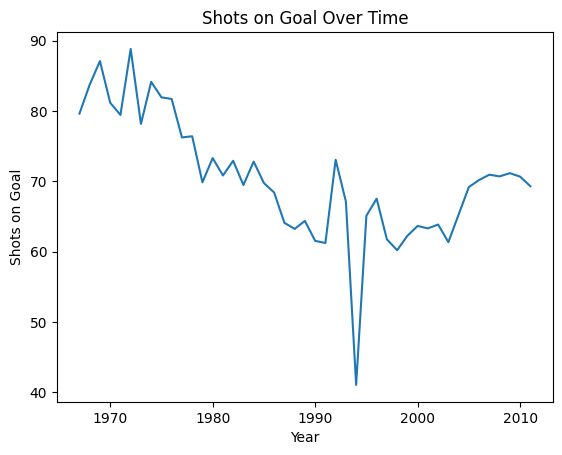

In [72]:
#plot the number of shots on goal over the span of the NHL
plt.plot(per_team_df.index, per_team_df['Shots on Goal'], linestyle='-')
plt.xlabel('Year')
plt.ylabel('Shots on Goal')
plt.title('Shots on Goal Over Time')
plt.show()


In [14]:
#filter years from 1980 through 2011
filtered_years =clean_data[(clean_data.index >= 1980)]
filtered_years


,First Name,Last Name,Team ID,Games Played,Goals,Assists,Pts,Shots on Goal
year,,,,,,,,
1997,Antti,Aalto,ANA,3.0,0.0,0.0,0.0,1.0
1998,Antti,Aalto,ANA,73.0,3.0,5.0,8.0,61.0
1999,Antti,Aalto,ANA,63.0,7.0,11.0,18.0,102.0
2000,Antti,Aalto,ANA,12.0,1.0,1.0,2.0,18.0
2007,Justin,Abdelkader,DET,2.0,0.0,0.0,0.0,6.0
...,...,...,...,...,...,...,...,...
2002,Andrei,Zyuzin,MIN,66.0,4.0,12.0,16.0,113.0
2003,Andrei,Zyuzin,MIN,65.0,8.0,13.0,21.0,104.0
2005,Andrei,Zyuzin,MIN,57.0,7.0,11.0,18.0,80.0


In [15]:
#get data types for all cols
filtered_years.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28616 entries, 1997 to 2007
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   First Name     28616 non-null  object 
 1   Last Name      28616 non-null  object 
 2   Team ID        28616 non-null  object 
 3   Games Played   28508 non-null  float64
 4   Goals          28508 non-null  float64
 5   Assists        28508 non-null  float64
 6   Pts            28508 non-null  float64
 7   Shots on Goal  28508 non-null  float64
dtypes: float64(5), object(3)
memory usage: 2.0+ MB


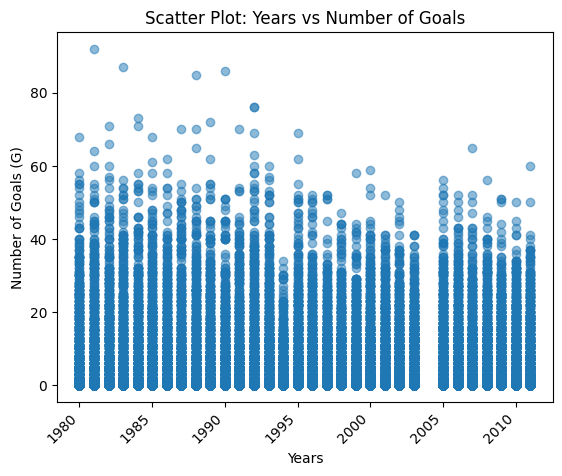

In [16]:
plt.scatter(filtered_years.index, filtered_years['Goals'], alpha=0.5)
plt.xlabel('Years')
plt.ylabel('Number of Goals (G)')
plt.title('Scatter Plot: Years vs Number of Goals')
plt.xticks(rotation=45, ha='right')
plt.show()


In [73]:
yearly_goal_avg = pd.DataFrame(clean_data.groupby('Year')['Goals'].mean().reset_index())

yearly_goal_avg

,Year,Goals
0,1909,6.787500
1,1910,7.189655
2,1911,8.500000
3,1912,6.980198
4,1913,6.848214
...,...,...
97,2007,6.637897
98,2008,6.666032
99,2009,6.491412
100,2010,6.352552


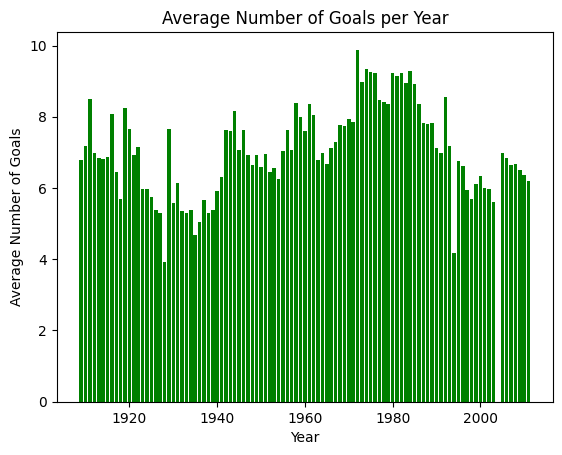

In [74]:
plt.bar(yearly_goal_avg['Year'], yearly_goal_avg['Goals'], color='green')
plt.xlabel('Year')
plt.ylabel('Average Number of Goals')
plt.title('Average Number of Goals per Year')
plt.show()


In [64]:
#read in the goalie data into a dataframe from a CSV
goalie_path = Path('hockey_starting_data', 'Goalies.csv')
goalie_data = pd.read_csv(goalie_path, on_bad_lines='skip')
goalie_data = pd.merge(goalie_data, name_data, on='playerID')
#clean dataframe
goalie_data = goalie_data[['firstName','lastName', 'GP', 'year', 'tmID','lgID','GA','SA']]
goalie_data=goalie_data.rename(columns={'firstName': 'First Name', 'lastName': 'Last Name', 'GP': 'Games Played', 'year': 'Year', 'tmID':'Team ID', 'lgID':'League', 'GA': 'Goals Allowed', 'SA':'Saves'})
goalie_data = goalie_data.dropna()
goalie_data = goalie_data[goalie_data['League']=='NHL']
goalie_data

,First Name,Last Name,Games Played,Year,Team ID,League,Goals Allowed,Saves
6,David,Aebischer,26.0,2000,COL,NHL,52.0,538.0
7,David,Aebischer,21.0,2001,COL,NHL,37.0,538.0
8,David,Aebischer,22.0,2002,COL,NHL,50.0,593.0
9,David,Aebischer,62.0,2003,COL,NHL,129.0,1703.0
10,David,Aebischer,43.0,2005,COL,NHL,123.0,1233.0
...,...,...,...,...,...,...,...,...
4182,Wendell,Young,31.0,1992,TBL,NHL,97.0,758.0
4183,Wendell,Young,9.0,1993,TBL,NHL,20.0,211.0
4184,Wendell,Young,10.0,1994,PIT,NHL,27.0,255.0
4185,Matt,Zaba,1.0,2009,NYR,NHL,2.0,16.0


In [92]:
#create a dataframe that gets the avg player statistics by year
avg_ga  =goalie_data.groupby('Year')['Goals Allowed'].mean()
avg_sa = goalie_data.groupby('Year')['Saves'].mean()
avg_ga = pd.DataFrame(avg_ga)
avg_sa = pd.DataFrame(avg_sa)
avg_goalie_stats = pd.merge(avg_sa,avg_ga, on='Year')
avg_player_stats = pd.merge(avg_goalie_stats, yearly_goal_avg, on='Year')
avg_player_stats

,Year,Saves,Goals Allowed,Goals
0,1982,693.418919,86.216216,9.223011
1,1983,713.902778,90.319444,8.955405
2,1984,742.579710,93.246377,9.275568
3,1985,724.263889,91.055556,8.913102
4,1986,752.238806,90.238806,8.364993
5,1987,774.939394,93.121212,7.815789
6,1988,674.506667,82.053333,7.789343
7,1989,677.960000,80.586667,7.834177
8,1990,624.662500,71.200000,7.131450
9,1991,661.197531,73.950617,6.981756


Text(0.5, 1.0, 'Saves Over Years')

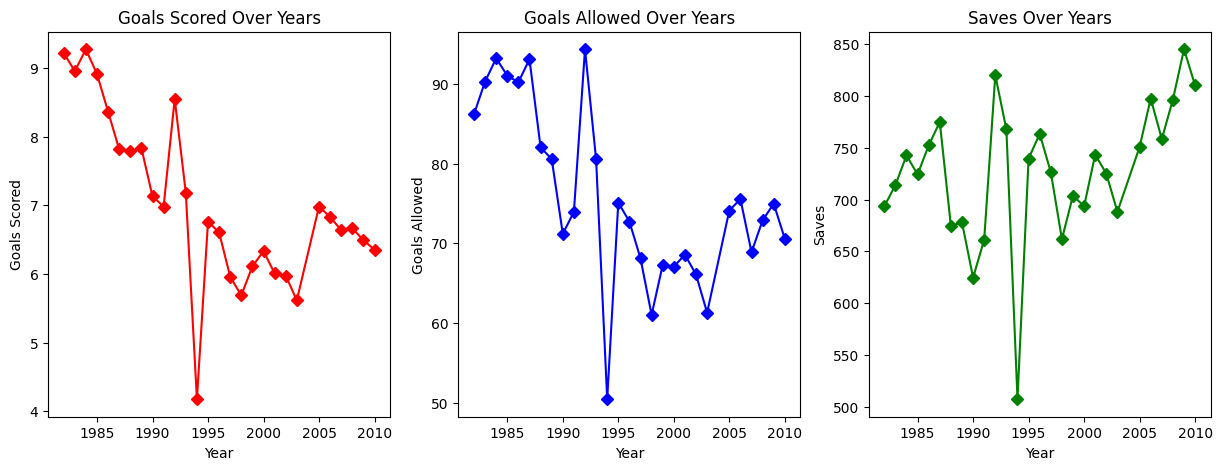

In [17]:
#create a 3 subplots using the avg player data
fix, (ax1, ax2, ax3) = plt.subplots(1,3, figsize = (15,5))
ax1.plot(avg_player_stats['Year'], avg_player_stats['Goals'], color= 'red', marker='D' )
ax1.set_xlabel('Year')
ax1.set_ylabel('Goals Scored')
ax1.set_title('Goals Scored Over Years')

ax2.plot(avg_player_stats['Year'], avg_player_stats['Goals Allowed'], color='blue', marker='D')
ax2.set_xlabel('Year')
ax2.set_ylabel('Goals Allowed')
ax2.set_title('Goals Allowed Over Years')


ax3.plot(avg_player_stats['Year'], avg_player_stats['Saves'], color='green', marker='D')
ax3.set_xlabel('Year')
ax3.set_ylabel('Saves')
ax3.set_title('Saves Over Years')